<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamB/blob/main/Demographie_Analyse_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Das hier ist ein Test

In [1]:
# Ggf. fehlende Pakete  installieren
!pip install ipython-sql
!pip install sqlalchemy
!pip install petl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 KB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for petl: filename=petl-1.7.12-py3-none-any.whl size=226970 sha256=f7202faa4b3731c7f770c756ed2a577a9b0ca0de1a3e20732c188dbcd74459b6
  Stored in directory: /root/.cache/pip/wheels/b0/20/a5/96748ad301276597fbd3df013975828fe5978edc4587f79514
Successfully built petl


In [57]:
from google.colab import drive
import sqlalchemy as sqla
import pandas as pd
import petl as etl
import csv
import sys
import datetime
import matplotlib.pyplot as plt
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
# Google Drive einbinden
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
base_url_staging = "/content/gdrive/MyDrive/Gruppe_B/DB_File"


In [19]:
#db_path_staging        =  "/content/gdrive/MyDrive/Gruppe_B/DB_File/staging.db"
#db_path_source_covid  = base_url_staging + "source_covid19_test.db"
db_path_source_covid  ="/content/gdrive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db"


#db_url_staging        = "sqlite:///" + db_path_staging
db_url_source_covid  = "sqlite:///" + db_path_source_covid


#db_staging            = sqla.create_engine(db_url_staging)
db_source_covid         = sqla.create_engine(db_url_source_covid)


#%sql $db_url_staging
%sql $db_url_source_covid


'Connected: @/content/gdrive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db'

In [20]:
%%sql $db_url_source_covid
ATTACH DATABASE '{db_path_source_covid}' AS covid;


(sqlite3.OperationalError) database covid is already in use
[SQL: ATTACH DATABASE '{db_path_source_covid}' AS covid;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [33]:
%%sql $db_url_source_covid

SELECT COUNT(DISTINCT Id) FROM patients



Done.


COUNT(DISTINCT Id)
1050


In [37]:
%%sql $db_url_source_covid

SELECT COUNT(Id) FROM patients
WHERE GENDER = 'F';

Done.


COUNT(Id)
522


In [38]:
%%sql $db_url_source_covid

SELECT COUNT(Id) FROM patients
WHERE GENDER = 'M';

Done.


COUNT(Id)
528


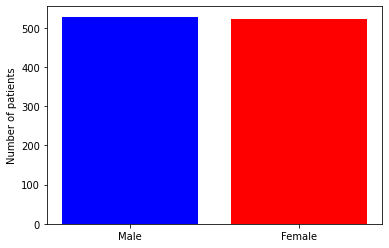

In [48]:
# import the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# run the SQL queries to get the number of male and female patients
query_male = """
SELECT COUNT(Id) as count_male
FROM patients
WHERE GENDER = 'M'
"""

query_female = """
SELECT COUNT(Id) as count_female
FROM patients
WHERE GENDER = 'F'
"""

# execute the queries and get the results
result_male = pd.read_sql_query(query_male, db_source_covid)
result_female = pd.read_sql_query(query_female, db_source_covid)

# plot the results
fig, ax = plt.subplots()

ax.bar(['Male', 'Female'], [result_male['count_male'][0], result_female['count_female'][0]], color=['blue', 'red'])
ax.set_ylabel('Number of patients')

plt.show()

In [49]:
result = %sql SELECT COUNT(Id) FROM patients WHERE DEATHDATE IS NOT NULL
print("Number of patients who died: ", result[0][0])



 * sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db
   sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_Filesource_covid19_test.db
Done.
Number of patients who died:  1050


In [51]:
%%sql $db_url_source_covid

PRAGMA table_info(patients);


Done.


cid,name,type,notnull,dflt_value,pk
0,Id,STRING,0,None,1
1,BIRTHDATE,DATE,0,None,0
2,DEATHDATE,DATE,0,None,0
3,SSN,STRING,0,None,0
4,DRIVERS,STRING,0,None,0
5,PASSPORT,STRING,0,None,0
6,PREFIX,STRING,0,None,0
7,FIRST,STRING,0,None,0
8,LAST,STRING,0,None,0
9,SUFFIX,STRING,0,None,0


In [52]:
%%sql $db_url_source_covid
UPDATE patients SET DEATHDATE = strftime('%Y-%m-%d', DEATHDATE);


1050 rows affected.


[]

In [53]:
result = %sql SELECT COUNT(Id) FROM patients WHERE DEATHDATE IS NOT NULL
print("Number of patients who died: ", result[0][0])

 * sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db
   sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_Filesource_covid19_test.db
Done.
Number of patients who died:  50


 * sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_File/source_covid19_test.db
   sqlite:////content/gdrive/MyDrive/Gruppe_B/DB_Filesource_covid19_test.db
Done.


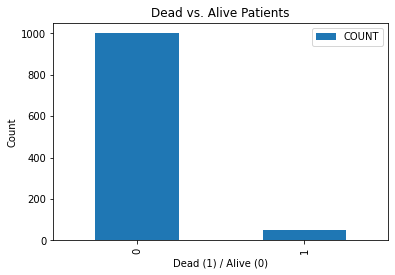

In [54]:
result = %sql SELECT (CASE WHEN DEATHDATE IS NOT NULL THEN 1 ELSE 0 END) AS DEAD, COUNT(Id) AS COUNT FROM patients GROUP BY DEAD
df = pd.DataFrame(result, columns=['DEAD', 'COUNT'])
df.set_index('DEAD', inplace=True)
df.plot(kind='bar')
plt.xlabel('Dead (1) / Alive (0)')
plt.ylabel('Count')
plt.title('Dead vs. Alive Patients')
plt.show()

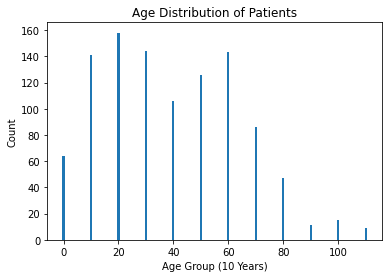

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect(db_path_source_covid)
df = pd.read_sql_query("SELECT BIRTHDATE, (julianday(current_timestamp) - julianday(BIRTHDATE)) / 365.25 AS AGE FROM patients", conn)

df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'])
df['AGE_GROUP'] = (df['AGE'] // 10 * 10).astype(int)
age_counts = df['AGE_GROUP'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group (10 Years)')
plt.ylabel('Count')
plt.title('Age Distribution of Patients')
plt.show()


